In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("stp_lm.csv")
df.dropna(inplace=True)

In [ ]:
 df.drop_duplicates(inplace=True)
print('after drop duplicates', df.shape)

after drop duplicates (49823, 2)


In [ ]:
df['Tweet'] = df['Tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
df.head(10)
df.shape

<ipython-input-4-e0642c75b29a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet'] = df['Tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


(49823, 2)

In [ ]:
#!pip3 install -U scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
c_vect = CountVectorizer()
X= c_vect.fit_transform(df["Tweet"])
c_vect.get_feature_names()[100:110]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['absence',
 'absentee',
 'absinthe',
 'absolut',
 'absolute',
 'absolutely',
 'absolutelybesutifulflower',
 'absolutelythem',
 'absolutly',
 'abstract']

In [ ]:
y = df["Label"].values

In [ ]:
from sklearn.model_selection import train_test_split

#X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101, stratify=y,shuffle = True)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((42349, 54353), (42349,), (7474, 54353), (7474,))

In [ ]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X_train_osm, y_train_osm = os.fit_resample(X_train, y_train)

In [ ]:
X_train_osm.shape, y_train_osm.shape, X_test.shape, y_test.shape

((182120, 54353), (182120,), (7474, 54353), (7474,))

In [ ]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train_osm, y_train_osm)

SVC()

In [ ]:
import itertools


def plot_confusion_matrix(cm, classes, normalize=True,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Gerçek Emojiler')
    plt.xlabel('Tahmini Emojiler')
    plt.tight_layout()

Normalized confusion matrix


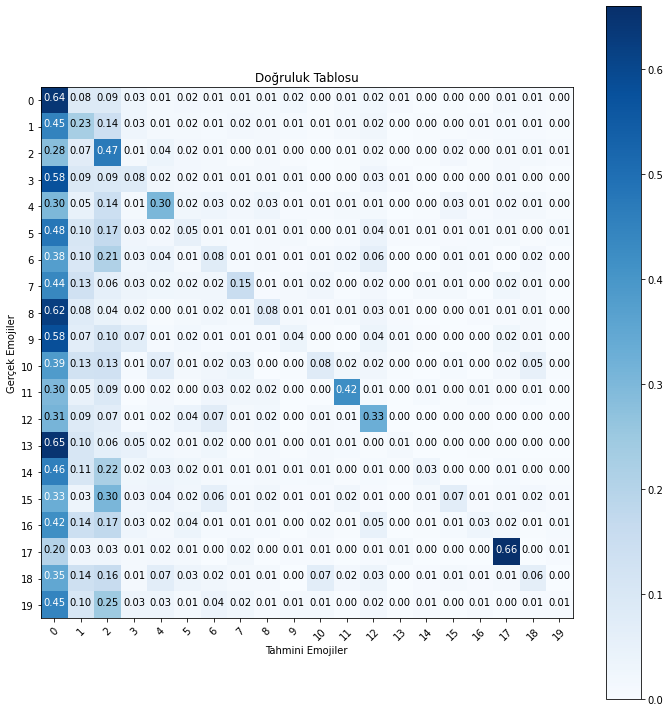

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
plot_confusion_matrix(cm, [i for i in range(20)] ,title='Doğruluk Tablosu', normalize=True)